 Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [21]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix,classification_report

In [2]:
data_train = pd.read_csv("SalaryData_Train.csv")
data_test = pd.read_csv("SalaryData_Test.csv")
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data_train.info()
data_train.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:xlabel='workclass', ylabel='count'>

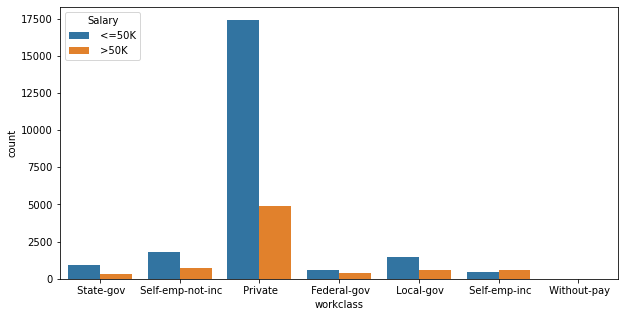

In [9]:
dims = (10,5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(ax = ax, data=data_train,x='workclass',hue='Salary')

<AxesSubplot:xlabel='occupation', ylabel='count'>

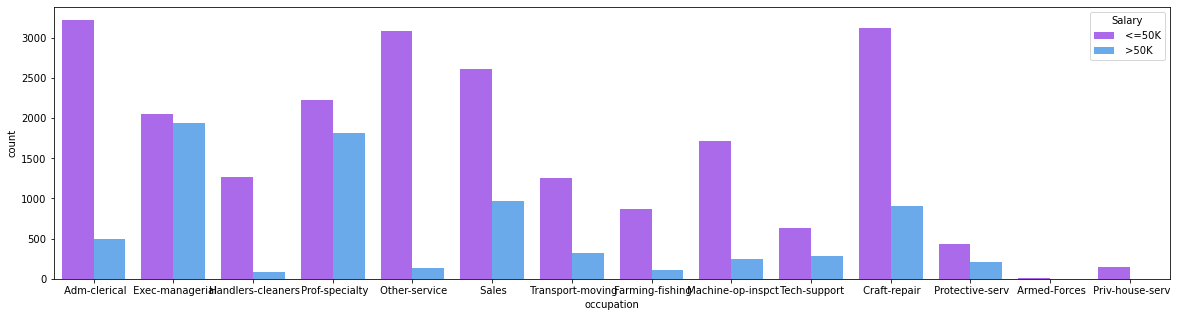

In [10]:
dims = (20,5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(data=data_train,x='occupation',hue='Salary',palette='cool_r')

In [11]:
data_train.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [13]:
data_test.Salary.value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [12]:
data_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# highly biased data

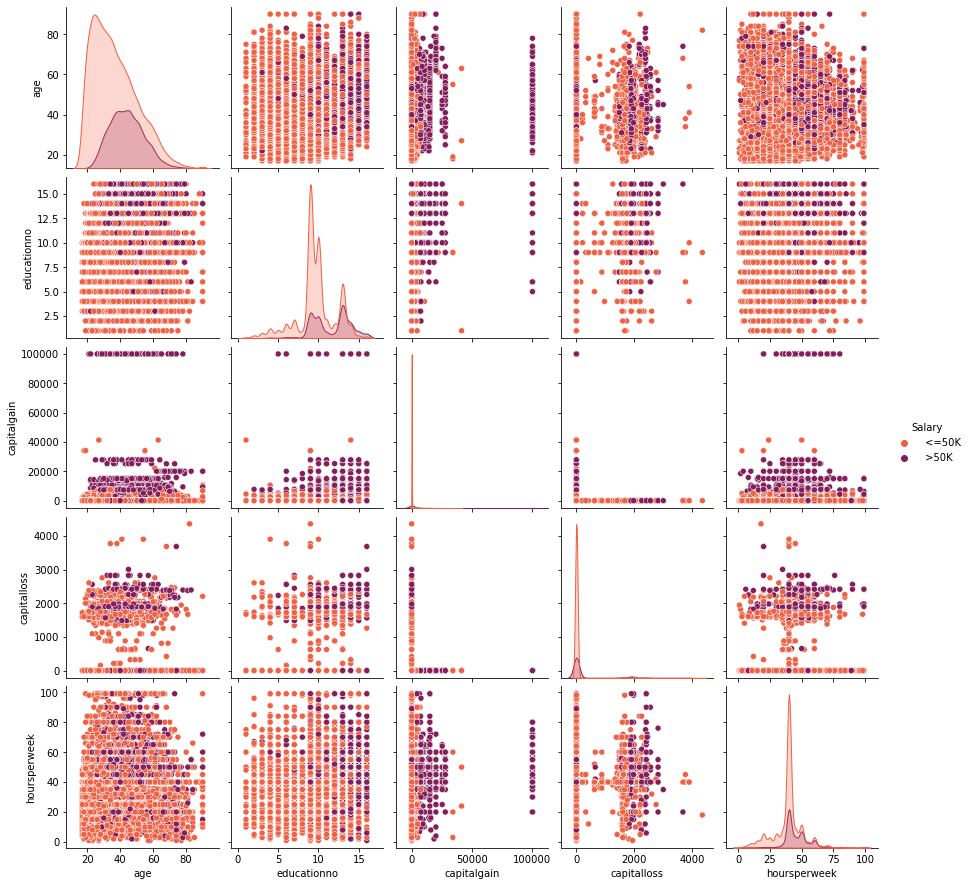

In [14]:
sns.pairplot(data_train,hue='Salary',palette='rocket_r')

In [15]:
# feature engineering
labels = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex','native', 'Salary']
dftrain = data_train.copy()
dftest = data_test.copy()
label_encoder = preprocessing.LabelEncoder()
for x in labels:
    dftrain[x] = label_encoder.fit_transform(dftrain[x])
    dftest[x] = label_encoder.fit_transform(dftest[x])
    #removing capitan gain and capital loss 

In [16]:
dftrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [18]:
#train test split
X_train = dftrain.iloc[:,:-1]
y_train = dftrain['Salary']
X_test = dftest.iloc[:,:-1]
y_test = dftest['Salary']

In [ ]:
#Naive Bayes Classifier
#MultinomialNB

In [19]:
model_mb = MB()
model_mb.fit(X_train,y_train)

MultinomialNB()

In [20]:
#GaussianlNB
model_gb = GB()
model_gb.fit(X_train,y_train)

GaussianNB()

In [22]:
# evaluating
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)

MultinomialNB
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



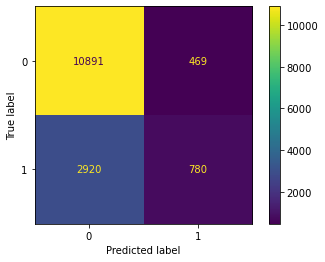

In [23]:
#MultinomialNB Evaluation
print('MultinomialNB')
report(model_mb)
#highly biased

GaussianNB
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



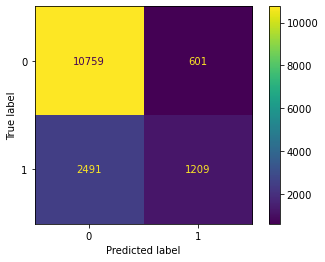

In [24]:
#GaussianNB Evaluation
print('GaussianNB')
report(model_gb)
# this is also biased but better than the previous.

In [25]:
#k fold
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model_mb, X_train, y_train, cv=kfold)
print(results.mean())

0.7729185807392064


In [26]:
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results = cross_val_score(model_gb, X_train, y_train, cv=kfold)
print(results.mean())

0.7953978735881289


In [27]:
#removing bias
from imblearn.combine import SMOTETomek
from collections import Counter

#SMOTEK TECHNIQUE

#Define training dataset
X_train2 = dftrain.iloc[:,:-1]
y_train2 = dftrain['Salary']

#Count (before)
print(Counter(y_train2))

smt = SMOTETomek(sampling_strategy = 'auto')
X_train3, y_train3 = smt.fit_resample(X_train2, y_train2 )

#Count (after)
print(Counter(y_train3))

Counter({0: 22653, 1: 7508})
Counter({0: 22213, 1: 22213})


In [28]:
#final model
model_fnl = GB()
model_fnl.fit(X_train3,y_train3)

GaussianNB()

GaussianNB
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.68      0.46      0.55      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.70      0.72     15060
weighted avg       0.80      0.81      0.80     15060



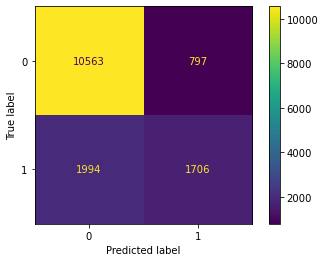

In [30]:
print('GaussianNB')
report(model_fnl)
#performs better after removing bias from training.

In [31]:
model_fnl.predict_proba(X_test)

array([[9.99997759e-01, 2.24085934e-06],
       [7.15555724e-01, 2.84444276e-01],
       [8.35081788e-01, 1.64918212e-01],
       ...,
       [4.13294097e-01, 5.86705903e-01],
       [8.24083610e-05, 9.99917592e-01],
       [4.73678624e-01, 5.26321376e-01]])